###Μηχανική Μάθηση
####2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή

Στην άσκηση αυτή θα εξερευνήσετε τεχνικές συσταδοποίησης και μείωσης διαστατικότητας σε εικόνες, ξεκινώντας από υπερφασματικά δεδομένα και προχωρώντας σε δεδομένα τηλεπισκόπησης.

- **Μέρος 1**: Θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης **k-means**, καθώς και την **fuzzy c-means**, σε συνδυασμό με τη μέθοδο μείωσης διαστατικότητας **PCA**, για την ανάλυση μιας υπερφασματικής εικόνας.

- **Μέρος 2**: Θα εργαστείτε με ένα σύνολο δεδομένων τηλεπισκόπησης και, με τη βοήθεια ενός προεκπαιδευμένου CNN, θα εξάγετε χαρακτηριστικά εικόνων για συσταδοποίηση, συγκρίνοντας τα αποτελέσματα με τη συσταδοποίηση με χρήση των pixels.

Ονοματεπώνυμο φοιτητή: Μαρία Ελπίδα Ντάφλου

Α.Μ.: 03121627

### 1. Φόρτωση υπερφασματικής εικόνας και των επισημειώσεων της

Κατεβάστε την υπερφασματική εικόνα `salinas_image.npy` και τις αντίστοιχες επισημειώσεις `salinas_labels.npy` από το Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.α. Φορτώστε την εικόνα και τις αντίστοιχες επισημειώσεις με χρήση της συνάρτησης np.load.

In [ ]:
import numpy as np

# Διαδρομές προς τα αρχεία
image_path = '/content/salinas_image.npy'
labels_path = '/content/salinas_labels.npy'

# Φόρτωση εικόνας και επισημειώσεων
salinas_image = np.load(image_path, allow_pickle = True)          #den ksero giati thelei to allow pickle
salinas_labels = np.load(labels_path, allow_pickle = True)

# Εμφάνιση βασικών πληροφοριών
print("Salinas Image Shape:", salinas_image.shape)
print("Salinas Labels Shape:", salinas_labels.shape)


Salinas Image Shape: (512, 217, 204)
Salinas Labels Shape: (512, 217)


Οι επισημειώσεις που φορτώσατε αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές κατηγορίες:

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

In [ ]:
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας στο ίδιο διάγραμμα

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση.

In [ ]:
#2a
height, width, num_channels = salinas_image.shape
print("Ύψος:", height)
print("Πλάτος:", width)
print("Αριθμός υπερφασματικών καναλιών:", num_channels)


Ύψος: 512
Πλάτος: 217
Αριθμός υπερφασματικών καναλιών: 204


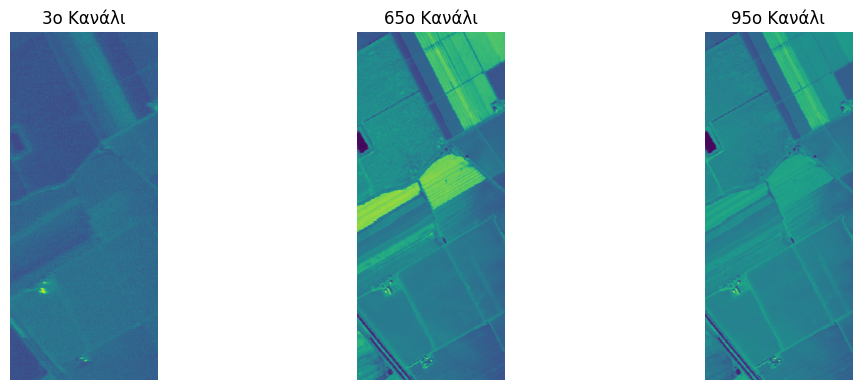

In [ ]:
#2b
import matplotlib.pyplot as plt

# Επιλέγουμε τα κανάλια της εικόνας (3ο, 65ο, και 95ο)
channel_3 = salinas_image[:, :, 2]  # 3ο κανάλι (θυμηθείτε ότι η μέτρηση ξεκινά από το 0)
channel_65 = salinas_image[:, :, 64]  # 65ο κανάλι
channel_95 = salinas_image[:, :, 94]  # 95ο κανάλι

# Δημιουργία του γραφήματος
plt.figure(figsize=(12, 4))

# Σχεδιάζουμε τα τρία κανάλια
plt.subplot(1, 3, 1)
plt.imshow(channel_3)
plt.title("3ο Κανάλι")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(channel_65)
plt.title("65ο Κανάλι")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(channel_95)
plt.title("95ο Κανάλι")
plt.axis('off')

# Εμφάνιση του γραφήματος
plt.tight_layout()
plt.show()


In [ ]:
#2c
# Υπολογισμός των μοναδικών κατηγοριών στις επισημειώσεις
unique_labels = np.unique(salinas_labels)

# Εμφάνιση των μοναδικών κατηγοριών και του αριθμού τους
print("Μοναδικές κατηγορίες:", unique_labels)
print("Αριθμός διαφορετικών κατηγοριών:", len(unique_labels))


Μοναδικές κατηγορίες: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Αριθμός διαφορετικών κατηγοριών: 17


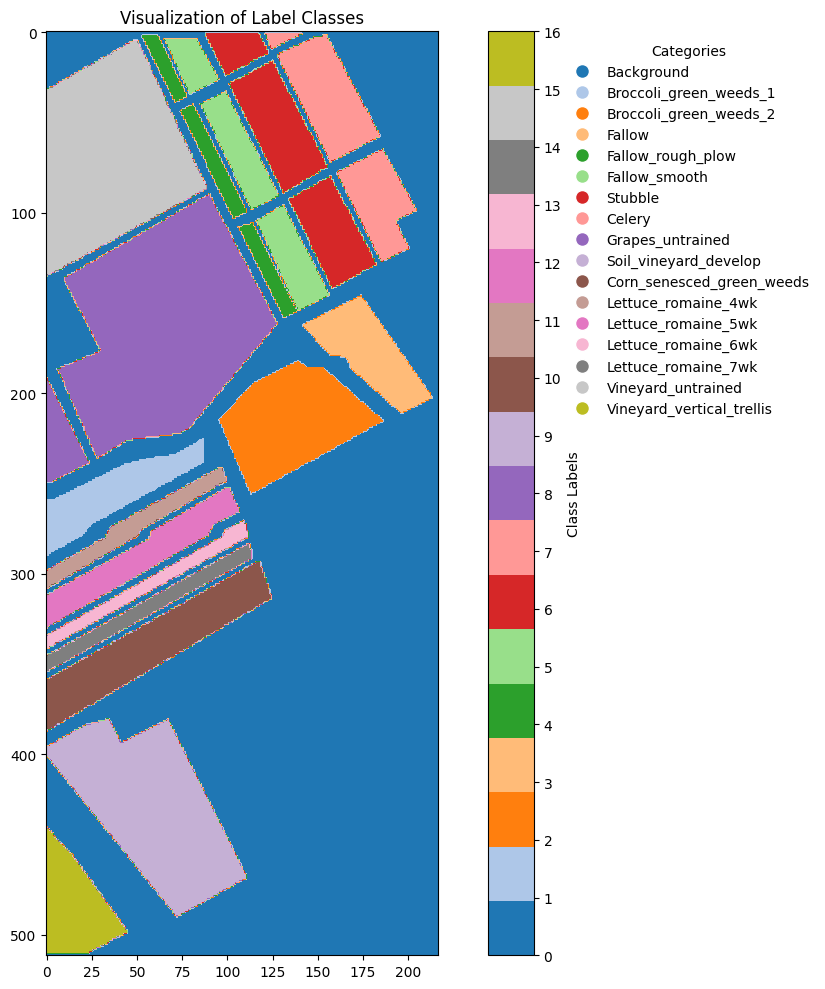

In [ ]:
#2d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Λίστα κατηγοριών
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

# Δημιουργία του διαγράμματος
plt.figure(figsize=(12, 10))
plt.title("Visualization of Label Classes")

# Χρησιμοποιούμε τον χρωματικό χάρτη tab20
cmap = ListedColormap(plt.cm.tab20.colors[:len(classes)])  # Περιορίζουμε στα απαραίτητα χρώματα
plt.imshow(salinas_labels, cmap=cmap)

# Προσθέτουμε χρωματική μπάρα
cbar = plt.colorbar(label="Class Labels")
cbar.set_ticks(np.arange(len(classes)))  # Θέτουμε τις τιμές στις θέσεις των κατηγοριών
cbar.set_ticklabels(range(len(classes)))  # Χρησιμοποιούμε αριθμητικές ετικέτες για το colorbar

# Δημιουργία επεξηγηματικής λεζάντας
patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab20.colors[i], markersize=10, label=classes[i])
    for i in range(len(classes))
]
plt.legend(
    handles=patches,
    bbox_to_anchor=(1.3, 1),  # Μετακίνηση της λεζάντας πιο δεξιά
    loc='upper left',
    title="Categories",
    frameon=False
)

# Προβολή του διαγράμματος
plt.tight_layout()
plt.show()


In [ ]:
#2e
# Εύρεση των μοναδικών κατηγοριών στις επισημειώσεις
unique_labels, pixel_counts = np.unique(salinas_labels, return_counts=True)
print(f"Μοναδικές κατηγορίες: {unique_labels}")

# Δημιουργία λεξικού με τις κατηγορίες και τα αντίστοιχα pixel
category_pixel_counts = {classes[label]: count for label, count in zip(unique_labels, pixel_counts)}

# Εμφάνιση αποτελεσμάτων
for category, count in category_pixel_counts.items():
    print(f"{category}: {count} pixels")

Μοναδικές κατηγορίες: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Background: 56975 pixels
Broccoli_green_weeds_1: 2009 pixels
Broccoli_green_weeds_2: 3726 pixels
Fallow: 1976 pixels
Fallow_rough_plow: 1394 pixels
Fallow_smooth: 2678 pixels
Stubble: 3959 pixels
Celery: 3579 pixels
Grapes_untrained: 11271 pixels
Soil_vineyard_develop: 6203 pixels
Corn_senesced_green_weeds: 3278 pixels
Lettuce_romaine_4wk: 1068 pixels
Lettuce_romaine_5wk: 1927 pixels
Lettuce_romaine_6wk: 916 pixels
Lettuce_romaine_7wk: 1070 pixels
Vineyard_untrained: 7268 pixels
Vineyard_vertical_trellis: 1807 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν.

💡 Χρησιμοποιήστε την `numpy reshape`

In [ ]:
# Μετατροπή της υπερφασματικής εικόνας σε πίνακα N x K
N, K = salinas_image.shape[0] * salinas_image.shape[1], salinas_image.shape[2]  # Υπολογισμός του N και K
reshaped_image = salinas_image.reshape((N, K))  # Μετατροπή σε N x K πίνακα

# Μετατροπή των επισημειώσεων σε διάνυσμα μήκους N
reshaped_labels = salinas_labels.flatten()  # Μετατροπή σε μονοδιάστατο διάνυσμα

# Εκτύπωση του νέου σχήματος της εικόνας και των επισημειώσεων
print("Σχήμα της μετατραπείσας εικόνας:", reshaped_image.shape)  # Πρέπει να είναι (N, K)
print("Σχήμα των μετατραπείσων επισημειώσεων:", reshaped_labels.shape)  # Πρέπει να είναι (N,)


Σχήμα της μετατραπείσας εικόνας: (111104, 204)
Σχήμα των μετατραπείσων επισημειώσεων: (111104,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, και σχεδιάστε την υπερφασματική υπογραφή των επιλεγμένων πίξελ.

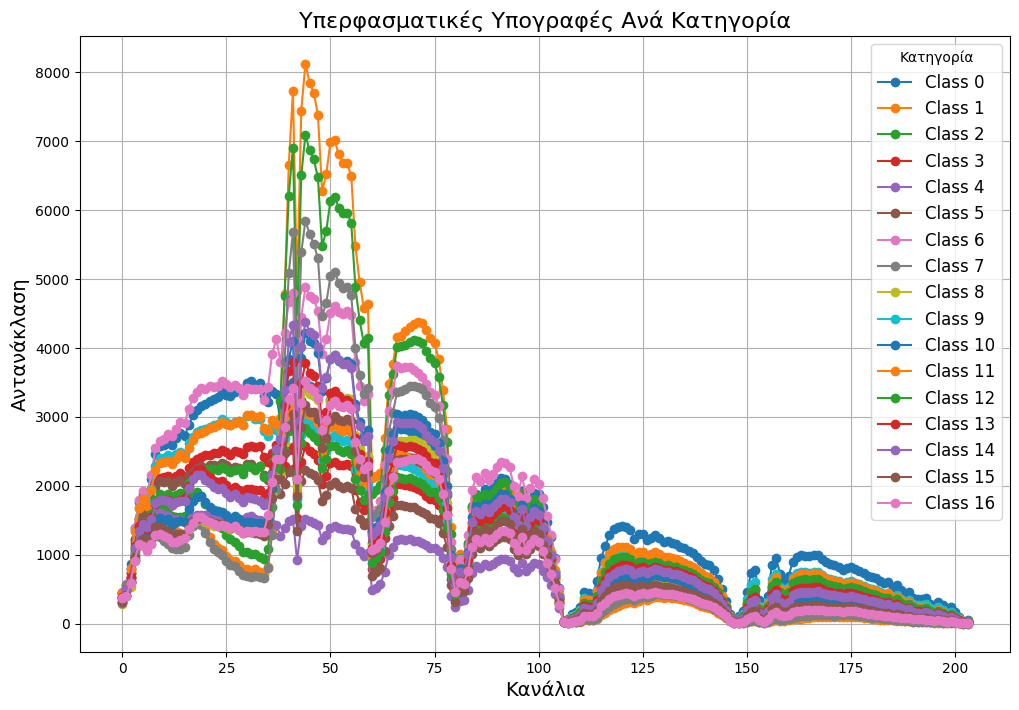

In [ ]:
import matplotlib.pyplot as plt

# Βρείτε τα pixel από κάθε κατηγορία
unique_classes = np.unique(reshaped_labels)  # Λίστα με μοναδικές κατηγορίες
spectral_signatures = {}  # Λεξικό για να αποθηκεύσουμε τις υπογραφές κάθε κατηγορίας

for class_label in unique_classes:
    # Εντοπισμός των pixel που ανήκουν στην κατηγορία
    indices = np.where(reshaped_labels == class_label)[0]
    # Επιλογή ενός τυχαίου pixel
    random_index = np.random.choice(indices)
    # Εξαγωγή της υπερφασματικής υπογραφής του pixel
    spectral_signatures[class_label] = reshaped_image[random_index]

# Σχεδίαση των υπερφασματικών υπογραφών
plt.figure(figsize=(12, 8))
for class_label, signature in spectral_signatures.items():
    plt.plot(signature, label=f"Class {class_label}", marker='o')

# Προσθήκη λεπτομερειών στο διάγραμμα
plt.title("Υπερφασματικές Υπογραφές Ανά Κατηγορία", fontsize=16)
plt.xlabel("Κανάλια", fontsize=14)
plt.ylabel("Αντανάκλαση", fontsize=14)
plt.legend(title="Κατηγορία", fontsize=12)
plt.grid(True)
plt.show()


3.γ. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
  * Ναι, ορισμένες καλλιέργειες είναι πιθανώς πιο εύκολα διαχωρίσιμες λόγω σημαντικών διαφορών στις φασματικές τους υπογραφές. Για παράδειγμα, καλλιέργειες με υψηλή διαφορά στην αντανάκλαση σε συγκεκριμένα μήκη κύματος μπορούν να ξεχωρίσουν εύκολα.
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;
  * Όχι, ορισμένα κανάλια είναι λιγότερο σημαντικά ή ακόμα και θορυβώδη, μειώνοντας την αποδοτικότητα του μοντέλου. Χρησιμοποιώντας μεθόδους επιλογής χαρακτηριστικών, μπορούμε να βελτιστοποιήσουμε τη χρήση καναλιών που προσφέρουν τη μεγαλύτερη διαχωριστική πληροφορία

3.δ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

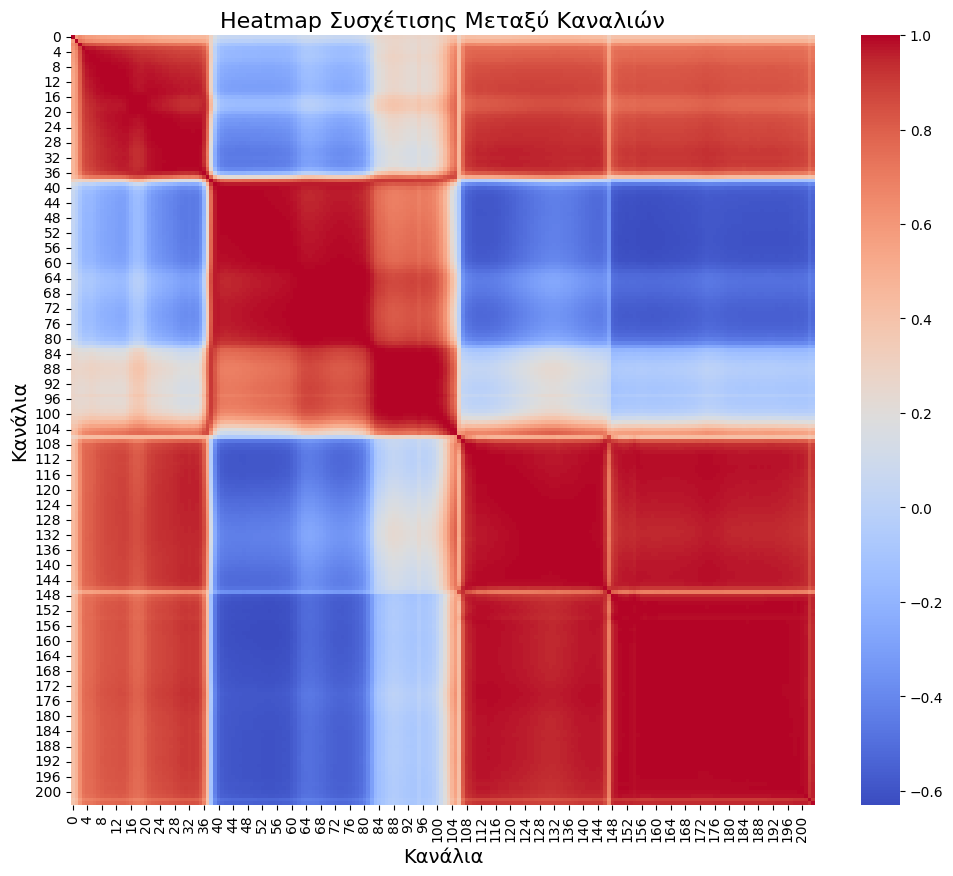

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Υπολογισμός πίνακα συσχέτισης μεταξύ των καναλιών
correlation_matrix = np.corrcoef(reshaped_image.T)

#Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=False)
plt.title("Heatmap Συσχέτισης Μεταξύ Καναλιών", fontsize=16)
plt.xlabel("Κανάλια", fontsize=14)
plt.ylabel("Κανάλια", fontsize=14)
plt.show()


### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=17`.

Αξιολογήστε την απόδοση του αλγορίθμου χρησιμοποιώντας τις ακόλουθες μετρικες:

* Adjusted Rand Index
* Silhouette Score

Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.

Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

Ο Silhouette Score είναι ένα μέτρο εσωτερικής αξιολόγησης, που εξετάζει τη συνοχή και τον διαχωρισμό των συστάδων χωρίς να λαμβάνει υπόψη πραγματικές κατηγορίες. Αντίθετα, ο Adjusted Rand Index (ARI) είναι μέτρο εξωτερικής αξιολόγησης, που συγκρίνει τις συστάδες με τις πραγματικές κατηγορίες (ground truth). Η χρήση και των δύο μαζί παρέχει μια συνολική εικόνα της ποιότητας της συσταδοποίησης.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Εφαρμογή του KMeans
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans_labels = kmeans.fit_predict(reshaped_image)  # 'reshaped_image' είναι ο πίνακας N x K

# Υπολογισμός ARI
ari = adjusted_rand_score(reshaped_labels, kmeans_labels)  # 'reshaped_labels' είναι το διάνυσμα ετικετών
print(f"Adjusted Rand Index: {ari:.4f}")

# Υπολογισμός Silhouette Score
silhouette = silhouette_score(reshaped_image, kmeans_labels)
print(f"Silhouette Score: {silhouette:.4f}")


Adjusted Rand Index: 0.1465
Silhouette Score: 0.4125


4.β. Χρησιμοποιώντας τα αποτελέσματα τις συσταδοποίησης, σχεδιάστε πάλι με χρήση της matplotlib την ταξινόμηση σε μορφή εικόνας, χρησιμοποιώντας για κάθε pixel τη συστάδα στην οποία έχει ανατεθεί.

Συγκρίνετε με την αρχική εικόνα των επισημειώσεων. Τι παρατηρείτε;

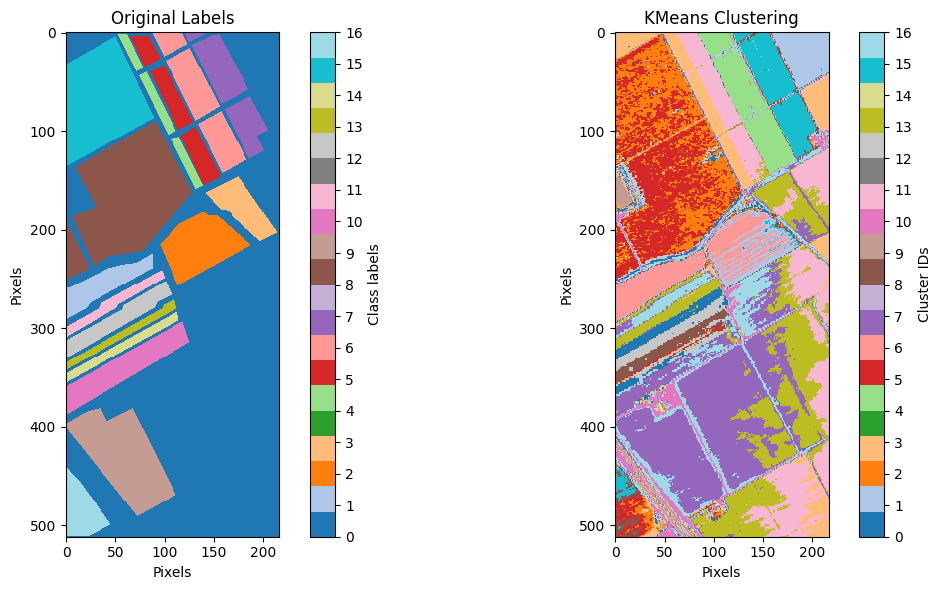

In [ ]:
# Ανακατασκευή της εικόνας από τις συστάδες
kmeans_image = kmeans_labels.reshape(salinas_labels.shape)  # Αναδιαμόρφωση σε ύψος × πλάτος

# Σχεδιασμός της εικόνας με τις συστάδες
plt.figure(figsize=(12, 6))

# Πρωτότυπη εικόνα επισημειώσεων
plt.subplot(1, 2, 1)
plt.imshow(salinas_labels, cmap='tab20', interpolation='nearest')
plt.title("Original Labels")
plt.colorbar(ticks=range(len(classes)), label="Class labels")
plt.xlabel("Pixels")
plt.ylabel("Pixels")

# Εικόνα συσταδοποίησης
plt.subplot(1, 2, 2)
plt.imshow(kmeans_image, cmap='tab20', interpolation='nearest')
plt.title("KMeans Clustering")
plt.colorbar(ticks=range(17), label="Cluster IDs")
plt.xlabel("Pixels")
plt.ylabel("Pixels")

plt.tight_layout()
plt.show()

Γενικά κάποιες κλάσεις είναι αρκετά καλά διαχψρισμένες (πάνω δεξιά) ενώ άλλες είτε γίνανε μία ομάδα (μπλε-καφέ) ή αλληλοεπικαλύπτονται (κέντρο). Αν οι φασματικές υπογραφές διαφορετικών κατηγοριών είναι πολύ κοντά μεταξύ τους, μπορεί να είναι δύσκολο να τις διαχωρίσουμε.

4.γ. Εφαρμογή του αλγορίθμου Fuzzy C-Means

Ο αλγόριθμος **Fuzzy C-Means** δεν περιλαμβάνεται στο scikit-learn, αλλά μπορούμε να τον εφαρμόσουμε χρησιμοποιώντας τη βιβλιοθήκη `fcmeans`.

#### **Βήμα 1: Εγκατάσταση της βιβλιοθήκης**
Πρώτα, εγκαταστήστε τη βιβλιοθήκη `fcmeans` εκτελώντας την παρακάτω εντολή σε ένα κελί:

```bash
!pip install fuzzy-c-means
```

#### Βήμα 2: Εκτέλεση του αλγορίθμου
Η fcmeans παρέχει λειτουργικότητα αντίστοιχη με τον τρόπο εκπαίδευσης του scikit-learn, επιτρέποντας εύκολη ενσωμάτωση στη ροή εργασιών σας.

Για περισσότερες πληροφορίες σχετικά με τη χρήση της βιβλιοθήκης, δείτε το documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Υπολογίστε πάλι το Silhouette Score και το ARI και συγκρίνετε με τις προηγούμενες μεθόδους.

Note. Ο αλγόριθμος θα τρέξει περίπου 15 λεπτά.

In [ ]:
#Step 1
!pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.14.0
    Uninstalling typer-0.14.0:
      Successfully uninstalled typer-0.14.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [ ]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
from fcmeans import FCM
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Εφαρμογή του Fuzzy C-Means
fcm = FCM(n_clusters=17, random_state=42)
fcm.fit(reshaped_image)  # Χρησιμοποιούμε τον πίνακα hyperspectral_data

# Λήψη των ετικετών (clusters) που επέλεξε ο αλγόριθμος
fcm_labels = fcm.predict(reshaped_image)

# Υπολογισμός του Silhouette Score και του Adjusted Rand Index
sil_score = silhouette_score(reshaped_image, fcm_labels)
ari_score = adjusted_rand_score(reshaped_labels, fcm_labels)

# Εμφάνιση των αποτελεσμάτων
print(f"Silhouette Score: {sil_score}")
print(f"Adjusted Rand Index: {ari_score}")


Silhouette Score: 0.35717550636894235
Adjusted Rand Index: 0.1352530332435927


Και στις δύο μετρικές παρατηρώ χαμηλότερο σκορ

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε

---

`n_components=3`

Εξήγηση Διακύμανσης για κάθε κύρια συνιστώσα:
[0.74473713 0.23531325 0.01134124]


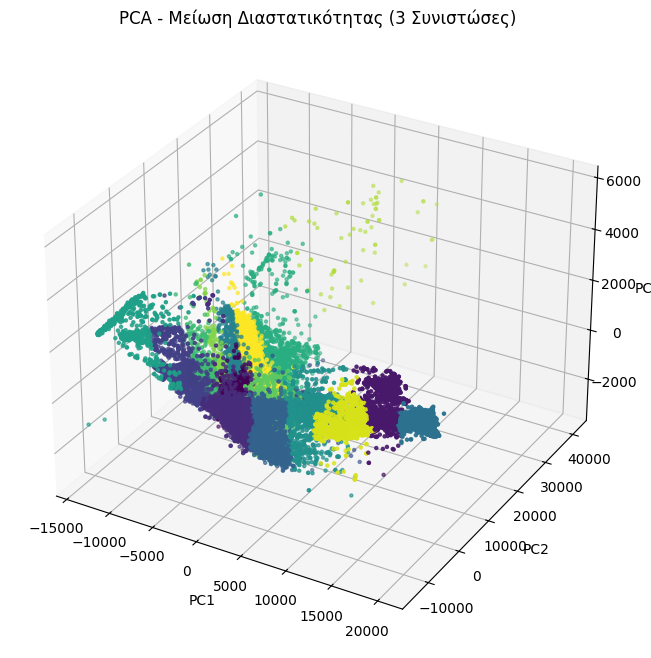

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Δημιουργία αντικειμένου PCA και εφαρμογή του με 3 κύριες συνιστώσες
pca = PCA(n_components=3)
pca_result = pca.fit_transform(reshaped_image)  # Υποθέτουμε ότι το hyperspectral_data είναι ο πίνακας N x K

# Εξαγωγή της διακύμανσης για καθεμία από τις κύριες συνιστώσες
explained_variance = pca.explained_variance_ratio_

# Εμφάνιση των αποτελεσμάτων
print("Εξήγηση Διακύμανσης για κάθε κύρια συνιστώσα:")
print(explained_variance)

# Έτσι, μπορούμε να δούμε ποσοστό της συνολικής διακύμανσης που εξηγείται από τις πρώτες 3 συνιστώσες.

# Σχεδίαση 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Σχεδίαση των τριών πρώτων συνιστωσών
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans_labels, cmap='viridis', s=5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Μείωση Διαστατικότητας (3 Συνιστώσες)')

plt.show()


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [ ]:
# Εξαγωγή της διακύμανσης που εξηγείται από κάθε κύρια συνιστώσα
explained_variance = pca.explained_variance_ratio_

# Υπολογισμός του συνολικού ποσοστού της διακύμανσης που διατηρείται από τις πρώτες 3 συνιστώσες
total_explained_variance = explained_variance.sum()

# Εμφάνιση του αποτελέσματος
print(f"Το ποσοστό της διακύμανσης που διατηρείται με n_components=3 είναι: {total_explained_variance * 100:.2f}%")


Το ποσοστό της διακύμανσης που διατηρείται με n_components=3 είναι: 99.14%


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές. Τι συμπεράσματα βγάζετε;



*   Παρατηρώ ότι έχουν αυξηθεί οι μετρικές πιθανόν λόγω της μείωσης του θορύβου.  Η PCA απομακρύνει τον θόρυβο και διατηρεί τις πιο σημαντικές πληροφορίες των δεδομένων. Αυτό μπορεί να κάνει τα δεδομένα πιο καθαρά και πιο διαχωρίσιμα για τον αλγόριθμο k-means. Η μείωση της διαστατικότητας μας επιτρέπει να οπτικοποιήσουμε τα δεδομένα σε χαμηλότερες διαστάσεις, καθιστώντας ευκολότερη την κατανόηση των σχέσεων μεταξύ των παρατηρήσεων.


6.β. Δοκιμάστε διαφορετικές τιμές για το n_components (από 1 έως 5) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό n_components και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;



*   Στο ARI Score παρατηρώ βελτίωση ενώ στο Silhouette μία μειώση που σημαίνει ότι με περισσότερα n τα σημεία εντάσσονται στις συστάδες με όλο και λιγότερη σιγουριά. Ωστόσο, μετά από ένα συγκεκριμένο σημείο, και το ARI σταθεροποιείται ή παρουσιάζει μικρή μείωση. Γενικά και στις δύο μετρικές παρατηρούνται μικρές μεταβολές στην απόδοση.



In [ ]:
#6a
from sklearn.decomposition import PCA

# Εφαρμογή PCA για μείωση διαστατικότητας σε 3 συνιστώσες
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(reshaped_image)

# Εμφάνιση ποσοστού της διακύμανσης που διατηρείται
print(f"Το ποσοστό της διακύμανσης που διατηρείται με n_components=3 είναι: {pca.explained_variance_ratio_.sum() * 100:.2f}%")


Το ποσοστό της διακύμανσης που διατηρείται με n_components=3 είναι: 99.14%


In [ ]:
from sklearn.cluster import KMeans

# Εφαρμογή KMeans με 17 συστάδες
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)


In [ ]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Υπολογισμός του ARI
ari = adjusted_rand_score(reshaped_labels, kmeans_labels)

# Υπολογισμός του Silhouette Score
sil_score = silhouette_score(reduced_data, kmeans_labels)

# Εμφάνιση των αποτελεσμάτων
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {sil_score:.3f}")


Adjusted Rand Index: 0.147
Silhouette Score: 0.435


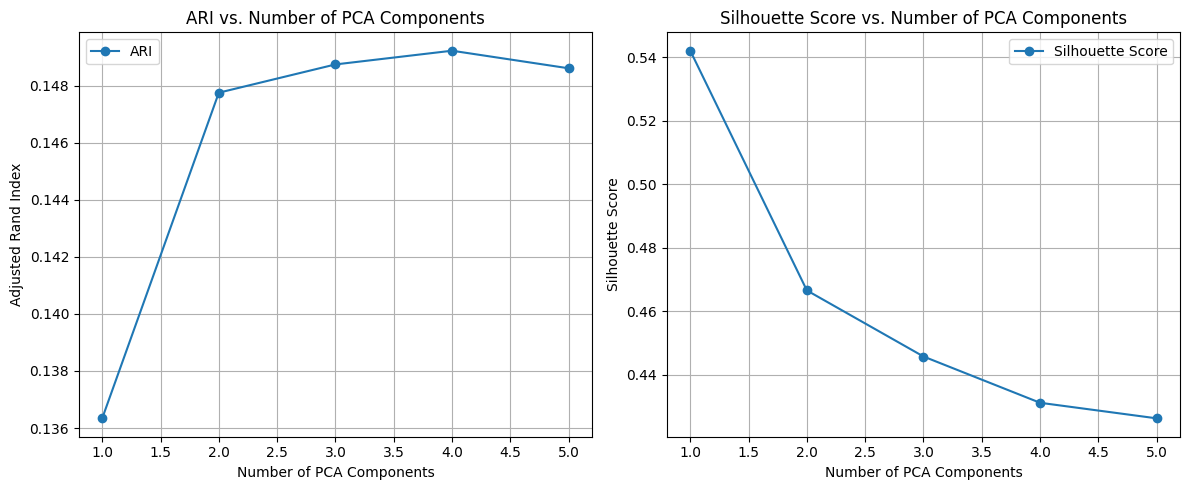

In [ ]:
#6b
ari_scores = []
silhouette_scores = []
n_components_range = range(1, 6)

for n_components in n_components_range:
    # Εφαρμογή PCA
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(reshaped_image)

    # Εφαρμογή KMeans
    kmeans = KMeans(n_clusters=17, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_data)

    # Υπολογισμός ARI και Silhouette Score
    ari = adjusted_rand_score(reshaped_labels, cluster_labels)
    silhouette = silhouette_score(pca_data, cluster_labels)

    # Αποθήκευση αποτελεσμάτων
    ari_scores.append(ari)
    silhouette_scores.append(silhouette)

# Διαγράμματα
plt.figure(figsize=(12, 5))

# Διάγραμμα για ARI
plt.subplot(1, 2, 1)
plt.plot(n_components_range, ari_scores, marker='o', label='ARI')
plt.xlabel('Number of PCA Components')
plt.ylabel('Adjusted Rand Index')
plt.title('ARI vs. Number of PCA Components')
plt.grid()
plt.legend()

# Διάγραμμα για Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of PCA Components')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# Μέρος 2: Χρήση προεκπαιδευμένου CNN για συσταδοποίηση

Σε αυτό το μέρος, θα χρησιμοποιήσουμε τη βιβλιοθήκη **Keras**, η οποία παρέχει εύκολη ενσωμάτωση προεκπαιδευμένων μοντέλων CNN και ευκολία στη διαχείριση δεδομένων. Στόχος μας είναι να αναδείξουμε τη δύναμη των χαρακτηριστικών που εξάγονται από προεκπαιδευμένα CNN (Convolutional Neural Networks) για τη συσταδοποίηση δεδομένων τηλεπισκόπησης.

Θα χρησιμοποιήσουμε ένα υποσύνολο από το σύνολο δεδομένων **EuroSAT**, το οποίο αποτελείται από δορυφορικές εικόνες κατανεμημένες σε 10 κατηγορίες (π.χ., καλλιέργειες, δάση, αστικές περιοχές). Τα χαρακτηριστικά που θα εξάγουμε από ένα προεκπαιδευμένο CNN θα χρησιμοποιηθούν για την ομαδοποίηση των εικόνων.

---

## 1. Φόρτωση του συνόλου δεδομένων

Για τους σκοπούς αυτής της άσκησης, θα χρησιμοποιήσουμε το σύνολο δεδομένων **EuroSAT**. Το EuroSAT περιλαμβάνει δορυφορικές εικόνες οργανωμένες σε φακέλους κατά κατηγορία.

---

### 1.α. Κατέβασμα και αποσυμπίεση του EuroSAT

Το EuroSAT δεν υποστηρίζεται απευθείας από το Keras, αλλά μπορείτε να το κατεβάσετε και να το αποσυμπιέσετε με τις παρακάτω εντολές:

```bash
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip
```

### 1.β. Ενσωμάτωση του Keras μέσω TensorFlow
Η βιβλιοθήκη Keras είναι ενσωματωμένη στο TensorFlow. Για να τη χρησιμοποιήσετε, πρέπει να εισάγετε τη βιβλιοθήκη TensorFlow και να χρησιμοποιήσετε τις κλάσεις της Keras μέσω του tensorflow.keras.

Παρακάτω φαίνεται πώς να φορτώσετε το EuroSAT χρησιμοποιώντας το ImageDataGenerator:


In [ ]:
 !wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
 ! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=1, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflating: 2750/SeaLake/SeaLake_2201.jpg  
  inflating: 2750/SeaLake/SeaLake_264.jpg  
  inflating: 2750/SeaLake/SeaLake_1314.jpg  
  infl

---

## 2. Χρήση προεκπαιδευμένου CNN για Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα, θα χρησιμοποιήσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**, το οποίο είναι διαθέσιμο μέσω της Keras. Το μοντέλο είναι εκπαιδευμένο στο σύνολο δεδομένων **ImageNet** και μπορεί να χρησιμοποιηθεί για την εξαγωγή ισχυρών χαρακτηριστικών από εικόνες. Αυτά τα χαρακτηριστικά θα χρησιμοποιηθούν για τη συσταδοποίηση των δεδομένων.

---

### 2.α. Δημιουργία Εξαγωγέα Χαρακτηριστικών

1. **Φόρτωση του MobileNetV3Small**:
   - Χρησιμοποιήστε τη βιβλιοθηκη `tensorflow.keras.applications` για να φορτώσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**.
   - Φροντίστε να ρυθμίσετε την παράμετρο `include_top=False` για να αφαιρέσετε το τελικό στρώμα ταξινόμησης.

2. **Pooling**:
   - Ενεργοποιήστε τη μέθοδο μέσου όρου (average pooling) στο τελικό στρώμα με την παράμετρο `pooling='avg'`. Αυτό θα εξασφαλίσει τη συμπύκνωση των χαρακτηριστικών σε έναν διαχειρίσιμο αριθμό διαστάσεων.


In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Φόρτωση του MobileNetV3Small χωρίς το top στρώμα
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Προσθήκη Global Average Pooling για συμπύκνωση χαρακτηριστικών
feature_extractor = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Εμφάνιση περίληψης του εξαγωγέα χαρακτηριστικών
feature_extractor.summary()


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

### 2.β. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Χρησιμοποιήστε τον εξαγωγέα χαρακτηριστικών που δημιουργήσατε για να επεξεργαστείτε το σύνολο δεδομένων (`dataset`) και να εξαγάγετε τα χαρακτηριστικά των εικόνων μέσω της μεθόδου `.predict()`. Αποθηκεύστε τα εξαγόμενα χαρακτηριστικά σε μια μεταβλητή και εκτυπώστε τις διαστάσεις τους για να επιβεβαιώσετε ότι η εξαγωγή έγινε σωστά. Τα χαρακτηριστικά αυτά θα χρησιμοποιηθούν στο επόμενο βήμα για συσταδοποίηση.


In [ ]:
import numpy as np

# Εξαγωγή χαρακτηριστικών για όλες τις εικόνες
features = []
labels = []

for i in range(len(dataset)):
    img, label = dataset[i]  # Φόρτωση της εικόνας και της ετικέτας
    extracted_features = feature_extractor.predict(img)  # Εξαγωγή χαρακτηριστικών
    features.append(extracted_features)
    labels.append(label)

# Μετατροπή σε numpy arrays για επεξεργασία
features = np.array(features).reshape(len(features), -1)  # Flatten τα χαρακτηριστικά
labels = np.array(labels).reshape(len(labels), -1)

print(f"Χαρακτηριστικά: {features.shape}, Ετικέτες: {labels.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━

### 2.γ. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Εφαρμόστε τον αλγόριθμο **KMeans** στα χαρακτηριστικά που εξήχθησαν θέτωντας αριθμό συστάδων 10, και υπολογίστε τη μετρική Adjusted Rand Index.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Δημιουργία και εκπαίδευση K-Means
n_clusters = 10  # Ο αριθμός συστάδων
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)

# Πρόβλεψη ετικετών συστάδων
predicted_labels = kmeans.labels_

# Υπολογισμός της μετρικής Adjusted Rand Index
# Χρησιμοποιούμε τις πραγματικές ετικέτες `labels` από τα δεδομένα
labels_flat = labels.argmax(axis=1)  # Μετατροπή one-hot encoded labels σε κατηγορίες
ari = adjusted_rand_score(labels_flat, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.5014


### 2δ: Συσταδοποίηση Χρησιμοποιώντας Μόνο τις τιμές των Pixel

Σε αυτήν την τελευταία φάση, θα επαναλάβετε τη συσταδοποίηση **χωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN**, αλλά χρησιμοποιώντας μόνο τα pixel των εικόνων ως χαρακτηριστικά.

1. **Κανονικοποίηση των Pixel**:
   - Κάθε εικόνα πρέπει να αναδιαταχθεί σε έναν μονοδιάστατο πίνακα και να κανονικοποιηθεί στις τιμές [0, 1].

2. **Ενοποίηση Δεδομένων**:
   - Συνδυάστε τα δεδομένα από όλες τις εικόνες σε έναν μεγάλο πίνακα με διαστάσεις `(N, M)`, όπου:
     - `N`: Ο αριθμός των εικόνων.
     - `M`: Ο αριθμός των pixel κάθε εικόνας.

3. **Εφαρμογή του KMeans**:
   - Χρησιμοποιήστε τον αλγόριθμο KMeans για τη συσταδοποίηση των εικόνων.

4. **Υπολογισμός Μετρικών**:
   - Υπολογίστε τον Adjusted Rand Index.

5. **Σύγκριση Αποτελεσμάτων**:
   - Συγκρίνετε τα αποτελέσματα με τη συσταδοποίηση που έγινε χρησιμοποιώντας τα χαρακτηριστικά από το CNN.

---


In [ ]:
import numpy as np

# Αρχικοποίηση λιστών για εικόνες και ετικέτες
images = []
labels = []

# Εξαγωγή δεδομένων από το dataset
for i in range(len(dataset)):
    img, label = dataset[i]  # Φόρτωση εικόνας και ετικέτας
    img_flat = img.flatten() / 255.0  # Κανονικοποίηση και μετατροπή σε μονοδιάστατο πίνακα
    images.append(img_flat)
    labels.append(label)

# Μετατροπή σε numpy arrays
images = np.array(images)
labels = np.array(labels).reshape(len(labels), -1)
labels_flat = labels.argmax(axis=1)  # One-hot -> κατηγορίες

print(f"Διαστάσεις εικόνων: {images.shape}, Ετικετών: {labels.shape}")


Διαστάσεις εικόνων: (2700, 150528), Ετικετών: (2700, 10)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Εκπαίδευση K-Means
n_clusters = 10  # Αριθμός συστάδων για το EuroSAT
kmeans_pixels = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pixels.fit(images)

# Πρόβλεψη ετικετών
predicted_labels_pixels = kmeans_pixels.labels_

# Υπολογισμός Adjusted Rand Index
ari_pixels = adjusted_rand_score(labels_flat, predicted_labels_pixels)

print(f"Adjusted Rand Index (Pixel Features): {ari_pixels:.4f}")


Adjusted Rand Index (Pixel Features): 0.1512


In [ ]:
print(f"ARI με χαρακτηριστικά CNN: {ari:.4f}")
print(f"ARI με χαρακτηριστικά Pixel: {ari_pixels:.4f}")

if ari > ari_pixels:
    print("Η συσταδοποίηση με CNN είναι πιο αποδοτική.")
else:
    print("Η συσταδοποίηση με Pixel είναι πιο αποδοτική.")


ARI με χαρακτηριστικά CNN: 0.5014
ARI με χαρακτηριστικά Pixel: 0.1512
Η συσταδοποίηση με CNN είναι πιο αποδοτική.


### 2.ε. Οπτικοποίηση αποτελεσμάτων

Χρησιμοποιήστε τα αποτελέσματα της συσταδοποίησης τόσο από τα χαρακτηριστικά που εξήχθησαν μέσω του CNN όσο και από τις τιμές των pixel. Για κάθε μέθοδο, επιλέξτε τυχαία 5 εικόνες από κάθε συστάδα και απεικονίστε τες σε ένα πλέγμα (grid), με χρήση της βιβλιοθήκης matplotlib.

Εξηγήστε τα αποτελέσματα της συσταδοποίησης:
- Είναι εμφανής ο διαχωρισμός των εικόνων σε συστάδες;
  Ναι είναι αρκετά διαφορετικές αλλά ορισμένες είναι αρεκτά παρόμοιες. πχ 1η με 6η
- Παρατηρείτε κοινά χαρακτηριστικά ή μοτίβα στις εικόνες κάθε συστάδας;
  Ναι παρατηρώ παρόμοια χρώματα και υφές  μεταξύ εικονών μίας συστάδας
- Πώς συγκρίνονται οι συστάδες που δημιουργήθηκαν από τα χαρακτηριστικά του CNN με αυτές που δημιουργήθηκαν από τις τιμές των pixel;
   Παρατηρώ πως στην συσταδοποίηση με pixel βρίσκω εικόνες που θα μπορούσαν να ανήκουν σε άλλη συστάδα ή παρατηρώ ανάμεικτα χαρακτηριστικά

Αναλύστε εάν η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βοήθησε στον καλύτερο διαχωρισμό των δεδομένων και πώς αυτό αντανακλά στις συστάδες και τα περιεχόμενά τους.

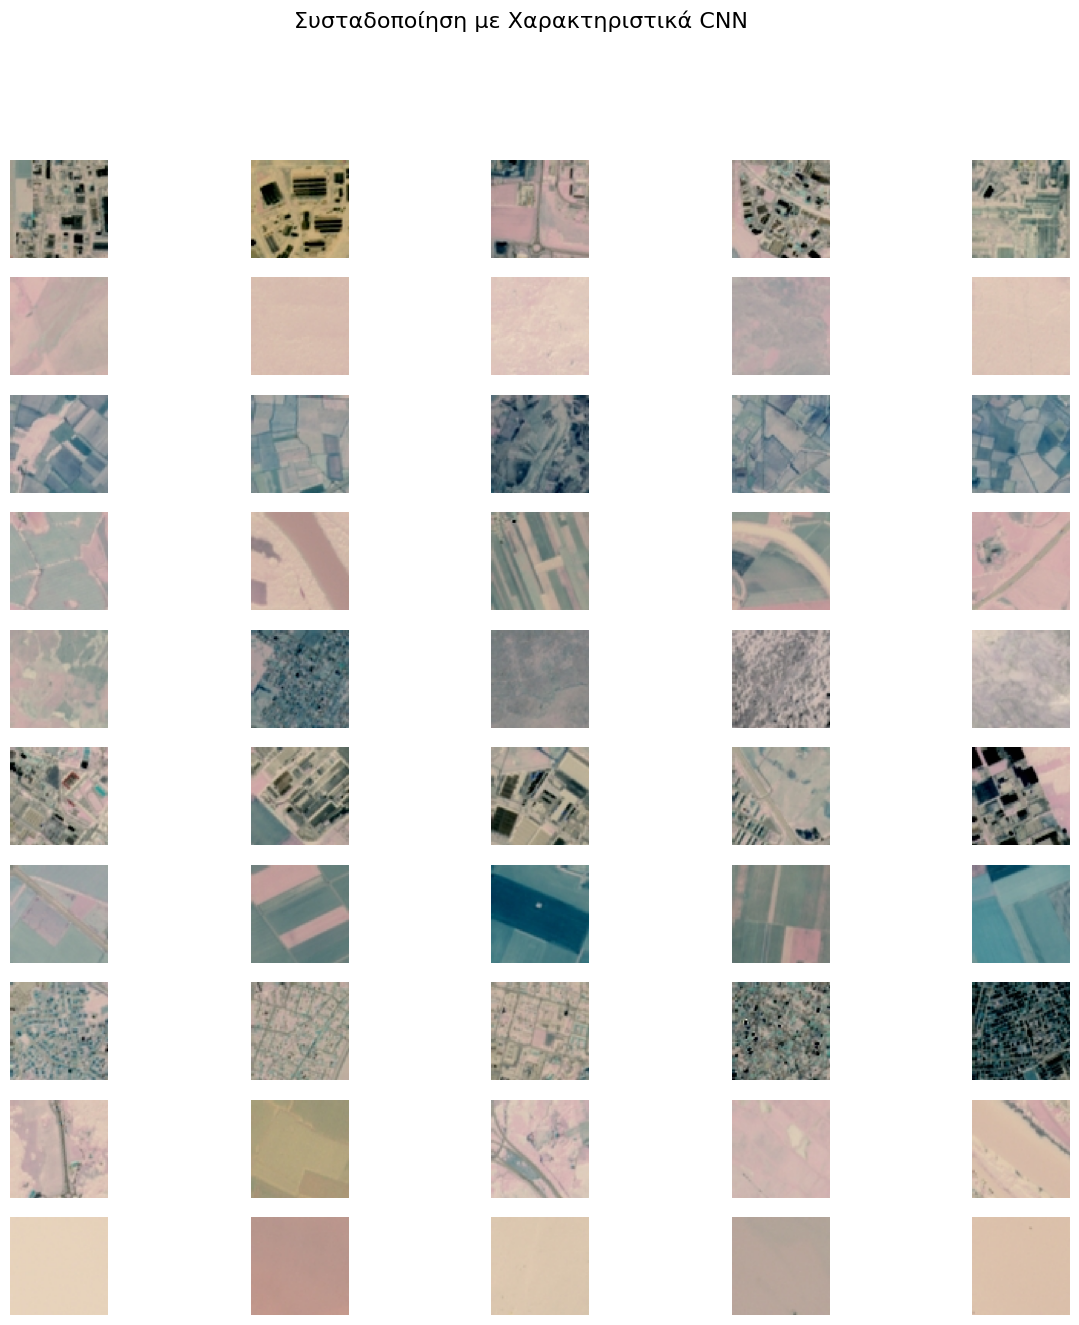

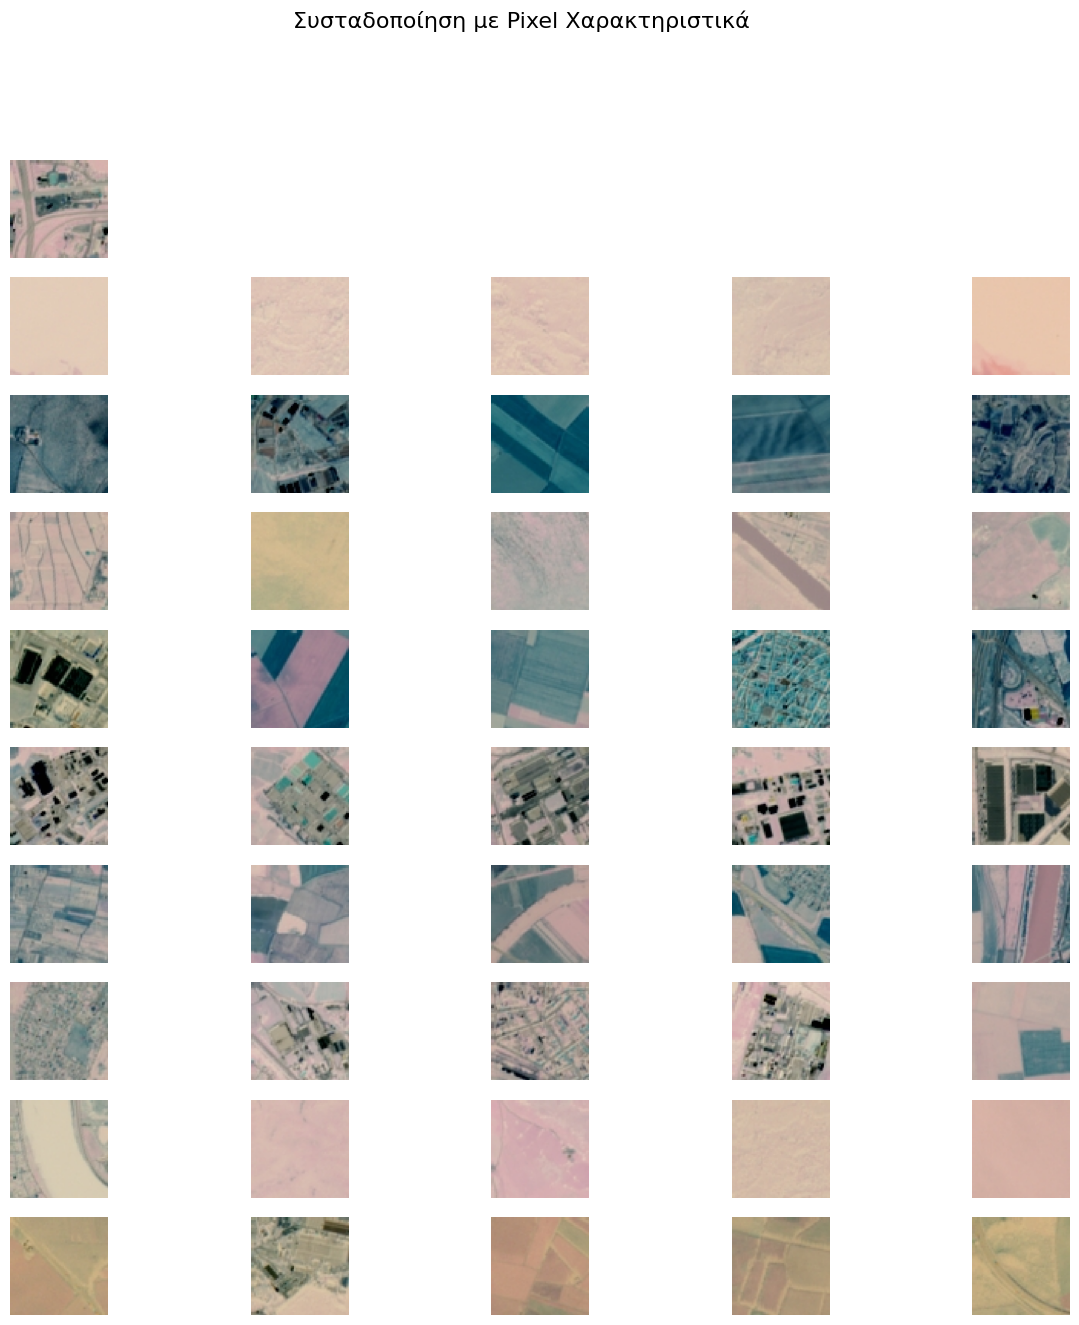

In [ ]:
import matplotlib.pyplot as plt
import random

def visualize_clusters(dataset, cluster_labels, title, num_clusters=10, samples_per_cluster=5):
    plt.figure(figsize=(15, 15))
    for cluster_id in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        selected_indices = random.sample(list(cluster_indices), min(len(cluster_indices), samples_per_cluster))

        for i, img_idx in enumerate(selected_indices):
            img, _ = dataset[img_idx]  # Φόρτωση εικόνας
            plt.subplot(num_clusters, samples_per_cluster, cluster_id * samples_per_cluster + i + 1)
            plt.imshow((img[0] * 255).astype('uint8'))  # Αντιστροφή κανονικοποίησης
            plt.axis('off')
            if i == 0:
                plt.ylabel(f"Cluster {cluster_id}", fontsize=12, rotation=90)
    plt.suptitle(title, fontsize=16)
    plt.show()

# Οπτικοποίηση Συσταδοποίησης με CNN Χαρακτηριστικά
visualize_clusters(dataset, kmeans.labels_, title="Συσταδοποίηση με Χαρακτηριστικά CNN")

# Οπτικοποίηση Συσταδοποίησης με Pixel Χαρακτηριστικά
visualize_clusters(dataset, kmeans_pixels.labels_, title="Συσταδοποίηση με Pixel Χαρακτηριστικά")
